# MODELISATION

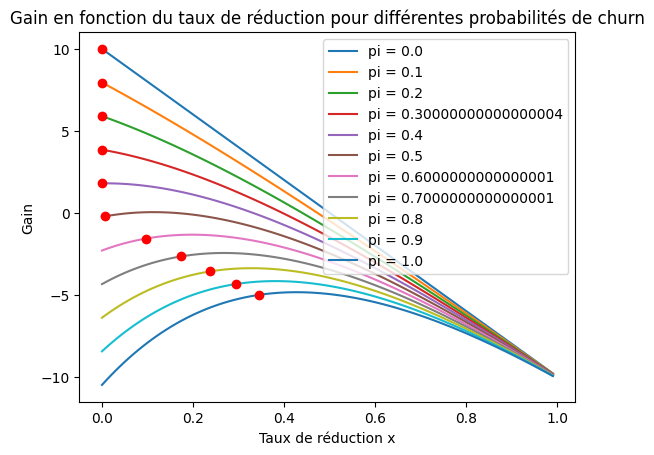

,Probability (pi),Optimal Reduction (x0),Maximum Gain
0,0.0,0.000000,10.000000
1,0.1,0.000000,7.950000
2,0.2,0.000000,5.900000
3,0.3,0.000000,3.850000
4,0.4,0.000000,1.800000
5,0.5,0.006228,-0.217549
6,0.6,0.097078,-1.567697
7,0.7,0.173045,-2.661497
8,0.8,0.238192,-3.570690
9,0.9,0.295126,-4.340978


In [8]:
from math import exp
import matplotlib.pyplot as plt
from scipy.optimize import bisect
import pandas as pd

def Gain(x, pi, ri=200, beta=0.5, alpha=1.5, cost=10):
    return (pi * exp(-alpha * x) * (-ri + ri * x - beta) + ri - ri * x - cost)

def derivate_Gain(x, pi, ri=200, beta=0.5, alpha=1.5, cost=10):
    return (pi * exp(-alpha * x) * (2 * ri - ri * x + beta) - ri)

probabilities = [i * 0.1 for i in range(11)]
X = [i * 0.01 for i in range(100)]
ri = 20

extremum = []
optimal_x = []

for pi in probabilities:
    # Vérifier les signes de la dérivée aux bornes
    if derivate_Gain(0, pi, ri) * derivate_Gain(1, pi, ri) < 0:
        # Utiliser la méthode de la bissection pour trouver l'extremum
        x0 = bisect(derivate_Gain, 0, 1, args=(pi, ri))
    else:
        x0 = 0
    
    optimal_x.append(x0)
    extremum.append(Gain(x0, pi, ri))
    
    # Calculer le gain pour différentes valeurs de réduction x
    Y = [Gain(x, pi, ri) for x in X]
    plt.plot(X, Y, label=f'pi = {pi}')
    plt.plot(x0, Gain(x0, pi, ri), 'ro')  # Marquer l'extremum

plt.xlabel('Taux de réduction x')
plt.ylabel('Gain')
plt.title('Gain en fonction du taux de réduction pour différentes probabilités de churn')
plt.legend()
plt.show()

# Créer un DataFrame pour afficher les probabilités, les valeurs de x0 et les gains maximaux associés
df = pd.DataFrame({
    'Probability (pi)': probabilities,
    'Optimal Reduction (x0)': optimal_x,
    'Maximum Gain': extremum
})

# Afficher le DataFrame
df